In [74]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 0. Common Parameters for all the Experiments

In [75]:
Heuristics = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Heuristics')
Heuristics['LDEG'] = fuzz.gaussmf(Heuristics.universe, 0.3,0.2)
Heuristics['GDEG'] = fuzz.gaussmf(Heuristics.universe, 0.7,0.2)
#Heuristics['LDEG'] = fuzz.trimf(Heuristics.universe, [0.0, 0.0, 1.0])
#Heuristics['GDEG'] = fuzz.trimf(Heuristics.universe, [0.0, 1.0, 1.0])

## You can change the defuzzification method 'centroid','bisector','mom','som','lom'
## Where they mean: mean of maximum, min of maximum, max of maximum
Heuristics.defuzzify_method = 'centroid'
Heuristics.defuzzify_method

'centroid'

## 0.1. Visualization of the fuzzy inference member functions (Takagi Sugeno)

C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


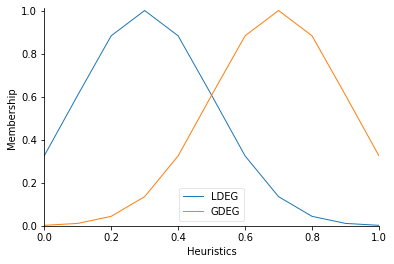

In [76]:
Heuristics.view()

# 1. Triangular Member Functions for Feature Fuzzification

## 1.1 Define the ranges of the Triangular Member functions for each feature

In [77]:
## 4 Features included in the Fire figther problem
### 1. Edge Density (Represented with two member functions)
ED = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'ED')
ED['EDL'] = fuzz.trimf(ED.universe, [0.0, 0.0, 1.0])
ED['EDH'] = fuzz.trimf(ED.universe, [0.0, 1.0, 1.0])

### 2. Burning Nodes (Represented with two member functions)
BN = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'BN')
BN['BNL'] = fuzz.trimf(BN.universe, [0.0, 0.0, 1.0])
BN['BNH'] = fuzz.trimf(BN.universe, [0.0, 1.0, 1.0])

### 3. Nodes in Danger (Represented with two member functions)
ND = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'ND')
ND['NDL'] = fuzz.trimf(ND.universe, [0.0, 0.0, 1.0])
ND['NDH'] = fuzz.trimf(ND.universe, [0.0, 1.0, 1.0])

### 4. Average Degree (Represented with two member functions)
AD = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'AD')
AD['ADL'] = fuzz.trimf(AD.universe, [0.0, 0.0, 1.0])
AD['ADH'] = fuzz.trimf(AD.universe, [0.0, 1.0, 1.0])

### 5. Burning Edges (Represented with two member functions)
#BE = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'BE Value')
#BE['BEL'] = fuzz.trimf(BE.universe, [0.0, 0.0, 1.0])
#BE['BEH'] = fuzz.trimf(BE.universe, [0.0, 1.0, 1.0])

## 1.2 Visualize the Triangular Member functions for each feature

C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


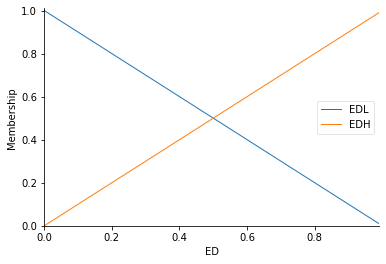

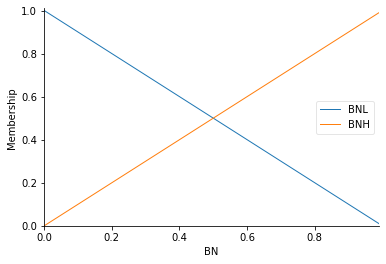

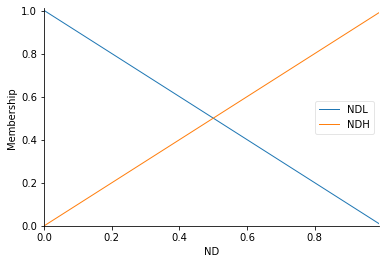

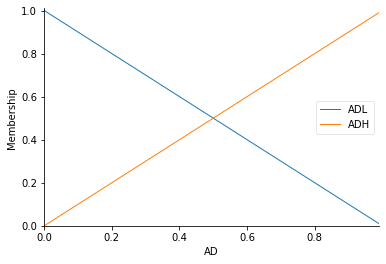

In [78]:
ED.view()
BN.view()
ND.view()
AD.view()
#BE.view() 

## 1.3. Fuzzy Rules

In [79]:
# Fuzzy Rules defined (One for the LDGE and another one for the GDGE)
rule1  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule2  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule3  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule4  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])
rule5  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule6  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule7  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule8  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])
rule9  = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule10 = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule11 = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule12 = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])
rule13 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule14 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule15 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule16 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])

## 1.4. Model Inference

0.3527937465822972


C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzz

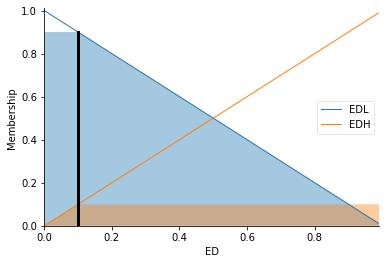

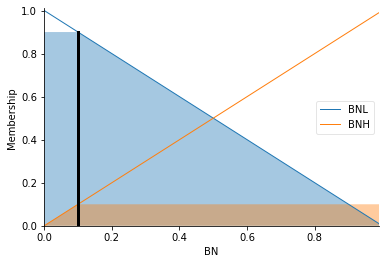

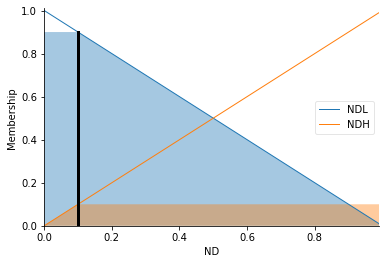

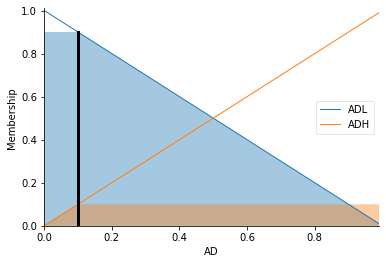

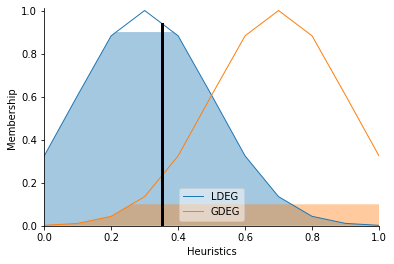

In [80]:
"""
Control System Creation and Simulation
---------------------------------------

Now that we have our rules defined, we can simply create a control system
via: """

rules = ctrl.ControlSystem([rule1, rule2, rule3, rule4, 
                            rule5, rule6, rule7, rule8, 
                            rule9, rule10, rule11, rule12,
                            rule13,rule14, rule15, rule16])
"""
In order to simulate this control system, we will create a
``ControlSystemSimulation``.  Think of this object representing our controller
applied to a specific set of cirucmstances.
"""
ffp_inference = ctrl.ControlSystemSimulation(rules)

"""
We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.
"""
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
ffp_inference.input['ED'] = 0.1
ffp_inference.input['BN'] = 0.1
ffp_inference.input['ND'] = 0.1
ffp_inference.input['AD'] = 0.1

# Crunch the numbers
ffp_inference.compute()

"""
Once computed, we can view the result as well as visualize it.
"""
print (ffp_inference.output['Heuristics'])
ED.view(sim=ffp_inference)
BN.view(sim=ffp_inference)
ND.view(sim=ffp_inference)
AD.view(sim=ffp_inference)
Heuristics.view(sim=ffp_inference)

# 2. Trapezoidal Member Functions for Feature Fuzzification

## 2.1 Define the ranges of the Trapezoidal Member functions for each feature

In [8]:
## 4 Features included in the Fire figther problem
### 1. Edge Density (Represented with two member functions)
ED = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'ED')
ED['EDL'] = fuzz.trapmf(ED.universe, [0, 0, 0.3, 1])
ED['EDH'] = fuzz.trapmf(ED.universe, [0, 0.7, 1, 1])

### 2. Burning Nodes (Represented with two member functions)
BN = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'BN')
BN['BNL'] = fuzz.trapmf(BN.universe, [0, 0, 0.3, 1])
BN['BNH'] = fuzz.trapmf(BN.universe, [0, 0.7, 1, 1])

### 3. Nodes in Danger (Represented with two member functions)
ND = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'ND')
ND['NDL'] = fuzz.trapmf(ND.universe, [0, 0, 0.3, 1])
ND['NDH'] = fuzz.trapmf(ND.universe, [0, 0.7, 1, 1])

### 4. Average Degree (Represented with two member functions)
AD = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'AD')
AD['ADL'] = fuzz.trapmf(AD.universe, [0, 0, 0.3, 1])
AD['ADH'] = fuzz.trapmf(AD.universe, [0, 0.7, 1, 1])

### 5. Burning Edges (Represented with two member functions)
#BE = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'BE Value')
#BE['BEL'] = fuzz.trapmf(BE.universe, [0, 0, 0.3, 1])
#BE['BEH'] = fuzz.trapmf(BE.universe, [0, 0.7, 1, 1])

## 2.2 Visualize the Trapezoidal Member functions for each feature

C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


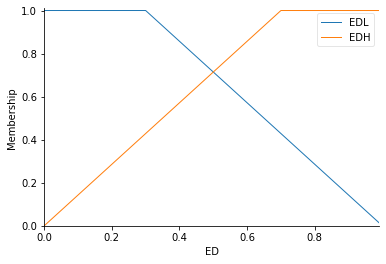

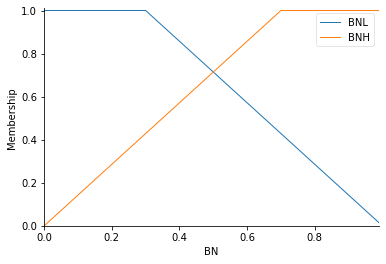

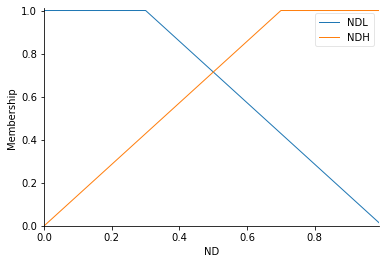

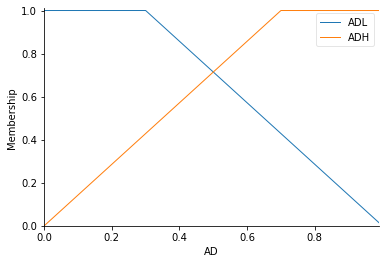

In [9]:
ED.view()
BN.view()
ND.view()
AD.view()
#BE.view()

## 2.3. Fuzzy Rules

In [10]:
# Fuzzy Rules defined (One for the LDGE and another one for the GDGE)
rule1  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule2  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule3  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule4  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])
rule5  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule6  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule7  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule8  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])
rule9  = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule10 = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule11 = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule12 = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])
rule13 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule14 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule15 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule16 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])

## 2.4. Model Inference

0.3303227366126025


C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzz

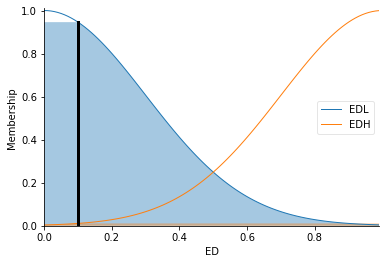

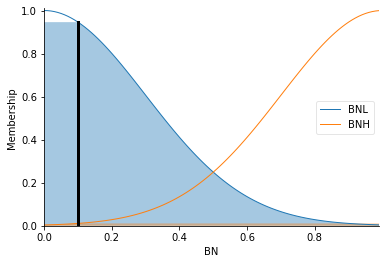

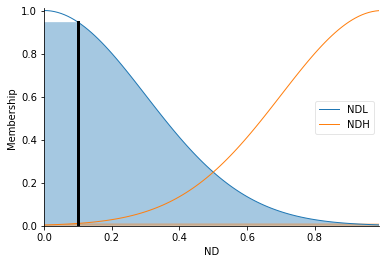

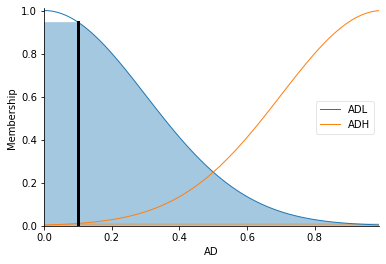

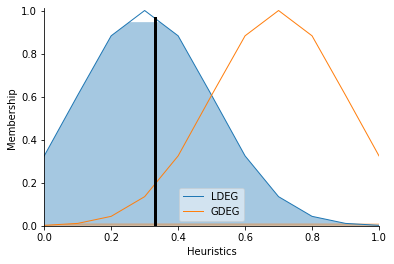

In [19]:
"""
Control System Creation and Simulation
---------------------------------------

Now that we have our rules defined, we can simply create a control system
via: """

rules = ctrl.ControlSystem([rule1, rule2, rule3, rule4, 
                            rule5, rule6, rule7, rule8, 
                            rule9, rule10, rule11, rule12,
                            rule13,rule14, rule15, rule16])
"""
In order to simulate this control system, we will create a
``ControlSystemSimulation``.  Think of this object representing our controller
applied to a specific set of cirucmstances.
"""
ffp_inference = ctrl.ControlSystemSimulation(rules)

"""
We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.
"""
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
ffp_inference.input['ED'] = 0.1
ffp_inference.input['BN'] = 0.1
ffp_inference.input['ND'] = 0.1
ffp_inference.input['AD'] = 0.1

# Crunch the numbers
ffp_inference.compute()

"""
Once computed, we can view the result as well as visualize it.
"""
print (ffp_inference.output['Heuristics'])
print (ffp_inference)
ED.view(sim=ffp_inference)
BN.view(sim=ffp_inference)
ND.view(sim=ffp_inference)
AD.view(sim=ffp_inference)
Heuristics.view(sim=ffp_inference)

# 3. Gaussian Member Functions for Feature Fuzzification

## 3.1 Define the ranges of the Gaussian Member functions for each feature

In [12]:
## 5 Features included in the Fire figther problem
### 1. Edge Density (Represented with two member functions)
ED = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'ED')
ED['EDL'] = fuzz.gaussmf(ED.universe, 0.0,0.3) # mean, std
ED['EDH'] = fuzz.gaussmf(ED.universe, 1.0,0.3)

### 2. Burning Nodes (Represented with two member functions)
BN = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'BN')
BN['BNL'] = fuzz.gaussmf(BN.universe, 0.0,0.3)
BN['BNH'] = fuzz.gaussmf(BN.universe, 1.0,0.3)

### 3. Nodes in Danger (Represented with two member functions)
ND = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'ND')
ND['NDL'] = fuzz.gaussmf(ND.universe, 0.0,0.3)
ND['NDH'] = fuzz.gaussmf(ND.universe, 1.0,0.3)

### 4. Average Degree (Represented with two member functions)
AD = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'AD')
AD['ADL'] = fuzz.gaussmf(AD.universe, 0.0,0.3)
AD['ADH'] = fuzz.gaussmf(AD.universe, 1.0,0.3)

### 5. Burning Edges (Represented with two member functions)
#BE = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'BE Value')
#BE['BEL'] = fuzz.gaussmf(BE.universe, 0.0,0.3)
#BE['BEH'] = fuzz.gaussmf(BE.universe, 1.0,0.3)

## 3.2 Visualize the Gaussian Member functions for each feature

C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


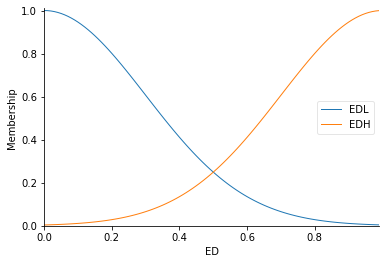

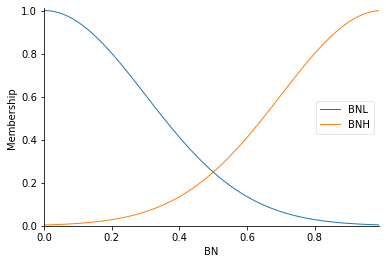

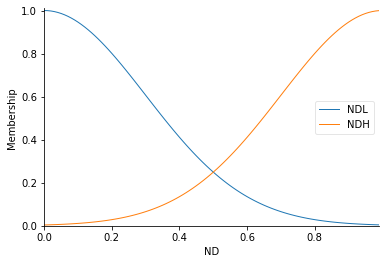

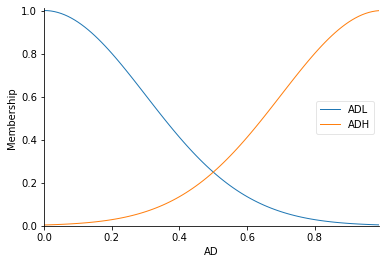

In [13]:
ED.view()
BN.view()
ND.view()
AD.view()
#BE.view()

## 3.3. Fuzzy Rules

In [14]:
# Fuzzy Rules defined (One for the LDGE and another one for the GDGE)
rule1  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule2  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule3  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule4  = ctrl.Rule(ED['EDL'] & BN['BNL'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])
rule5  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule6  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule7  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule8  = ctrl.Rule(ED['EDL'] & BN['BNH'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])
rule9  = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule10 = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule11 = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule12 = ctrl.Rule(ED['EDH'] & BN['BNL'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])
rule13 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDL'] & AD['ADL'], Heuristics['LDEG'])
rule14 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDL'] & AD['ADH'], Heuristics['GDEG'])
rule15 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDH'] & AD['ADL'], Heuristics['LDEG'])
rule16 = ctrl.Rule(ED['EDH'] & BN['BNH'] & ND['NDH'] & AD['ADH'], Heuristics['GDEG'])

## 3.4. Model Inference

0.3303227366126025


C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Andres\anaconda3\lib\site-packages\skfuzzy\control\fuzz

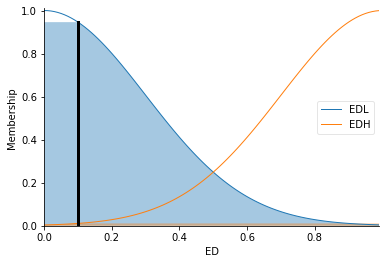

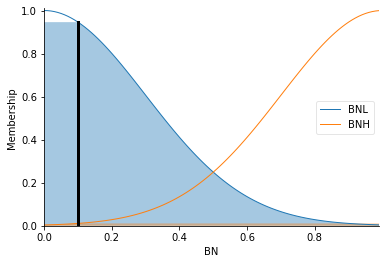

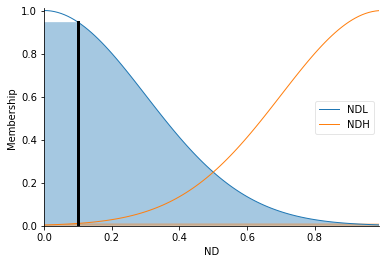

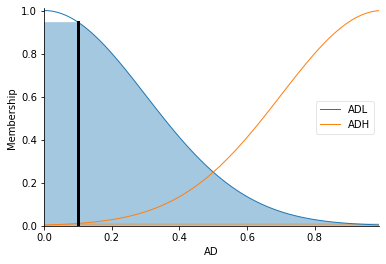

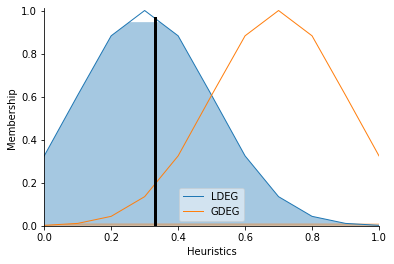

In [60]:
"""
Control System Creation and Simulation
---------------------------------------

Now that we have our rules defined, we can simply create a control system
via: """

rules = ctrl.ControlSystem([rule1, rule2, rule3, rule4, 
                            rule5, rule6, rule7, rule8, 
                            rule9, rule10, rule11, rule12,
                            rule13,rule14, rule15, rule16])
"""
In order to simulate this control system, we will create a
``ControlSystemSimulation``.  Think of this object representing our controller
applied to a specific set of cirucmstances.
"""
ffp_inference = ctrl.ControlSystemSimulation(rules)

"""
We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.
"""
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
ffp_inference.input['ED'] = 0.1
ffp_inference.input['BN'] = 0.1
ffp_inference.input['ND'] = 0.1
ffp_inference.input['AD'] = 0.1

# Crunch the numbers
ffp_inference.compute()

"""
Once computed, we can view the result as well as visualize it.
"""
print(ffp_inference.output['Heuristics'])
ED.view(sim=ffp_inference)
BN.view(sim=ffp_inference)
ND.view(sim=ffp_inference)
AD.view(sim=ffp_inference)
Heuristics.view(sim=ffp_inference)

In [59]:
print(dir(rules.rules))
#print(rules.rules.all_rules)


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_cached_graph', '_can_calc_rule', '_init_state', '_process_rules', 'all_graph', 'all_rules', 'calced_graph', 'control_system']

